In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## pandas - a package for data analysis and manipulation

In [2]:
# Let's generate a random dataset pretending a dataset used in recommender systems. Each row corresponds to a rating of a product
# by a user. Successive columns correspond to the time, the user id, the product id and the rating.

N = 100000

data_ = np.random.randint(1000, size=(N, 4))

df = pd.DataFrame(data_, columns=['time', 'uid', 'pid', 'rating'])
df['time'] = np.random.randint(24 * 60 * 60, size=(N))
df['time'] = pd.to_datetime('2025-01-01') + pd.to_timedelta(1e9 * df['time'])
df['rating'] = np.random.randint(10, size=(N))

df.head()

,time,uid,pid,rating
0,2025-01-01 07:30:06,446,287,7
1,2025-01-01 17:10:36,858,647,5
2,2025-01-01 18:47:56,656,111,6
3,2025-01-01 13:21:21,364,814,1
4,2025-01-01 05:43:53,131,359,2


569    136
78     133
925    130
294    129
241    127
501    126
233    126
750    126
214    125
742    125
557    125
247    124
525    124
166    123
762    123
614    122
722    122
167    122
164    122
39     121
194    121
653    120
387    120
492    120
797    120
Name: pid, dtype: int64

<AxesSubplot:>

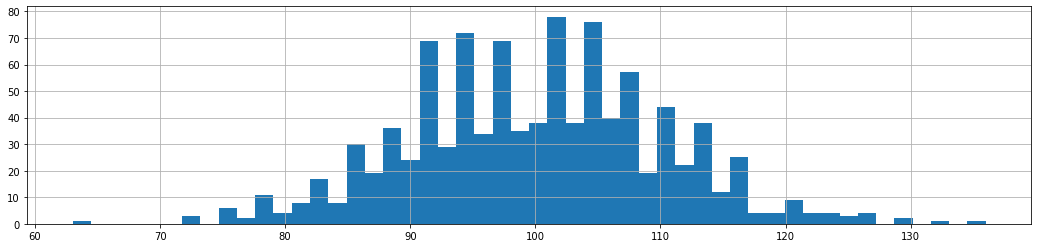

In [3]:
# Let's see the 25 most popular products in the dataset. Let's make a histogram of the product popularity.

df_ = df['pid'].value_counts()

display(df_.head(25))

df_.hist(figsize=(18, 4), bins=50)

In [4]:
# Let's prepare a sub-dataset that keeps only the 100 most popular products in the dataset and removes the others.

df_ = df['pid'].value_counts()

pids = df_.index[:100]

df_preprocessed = df[df['pid'].isin(pids)]
df_preprocessed

,time,uid,pid,rating
13,2025-01-01 09:37:17,212,614,3
32,2025-01-01 11:42:27,647,78,6
49,2025-01-01 12:26:55,876,569,5
51,2025-01-01 01:46:29,313,387,4
57,2025-01-01 11:44:01,199,159,0
...,...,...,...,...
99964,2025-01-01 20:06:41,44,569,3
99971,2025-01-01 22:29:04,151,81,8
99975,2025-01-01 20:46:58,672,136,7
99978,2025-01-01 00:59:29,645,592,1


In [5]:
# Let's see what is the mean of ratings given by each user (which may be interpreted as the user baseline rating or a type of
# the user optimism level).

df.groupby('uid')['rating'].mean().to_frame()

,rating
uid,
0,4.122807
1,4.038835
2,4.038095
3,4.803922
4,3.915094
...,...
995,4.476636
996,3.911765
997,4.684211


In [6]:
# Let's make the matrix of ratings, where columns correspond to products, rows correspond to users, and the values are the
# ratings (in fact, means of ratings, if an user rated a product multiple times).
# REMARK: Such a dataframe may require a large amount of memory. In practice, try to avoid it.

df.groupby(['uid', 'pid'])['rating'].mean().unstack().fillna(0.0)

pid,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
uid,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Let's see what is the mean of ratings in the entire system in successive hours during the day, from 8 a.m to 4 p.m.

df.set_index('time').between_time('8:00', '16:00').resample('1h')['rating'].mean().to_frame()

,rating
time,
2025-01-01 08:00:00,4.551974
2025-01-01 09:00:00,4.533269
2025-01-01 10:00:00,4.547273
2025-01-01 11:00:00,4.418017
2025-01-01 12:00:00,4.515427
2025-01-01 13:00:00,4.499057
2025-01-01 14:00:00,4.526586
2025-01-01 15:00:00,4.493559


time,2025-01-01 00:00:00,2025-01-01 01:00:00,2025-01-01 02:00:00,2025-01-01 03:00:00,2025-01-01 04:00:00,2025-01-01 05:00:00,2025-01-01 06:00:00,2025-01-01 07:00:00,2025-01-01 08:00:00,2025-01-01 09:00:00,...,2025-01-01 14:00:00,2025-01-01 15:00:00,2025-01-01 16:00:00,2025-01-01 17:00:00,2025-01-01 18:00:00,2025-01-01 19:00:00,2025-01-01 20:00:00,2025-01-01 21:00:00,2025-01-01 22:00:00,2025-01-01 23:00:00
uid,,,,,,,,,,,,,,,,,,,,,
0,3.250000,2.000000,3.666667,4.000000,3.800000,5.333333,4.250000,5.500000,3.500000,3.583333,...,4.444444,4.000000,4.200000,5.000000,3.750000,0.000000,6.000000,6.000000,3.800000,2.500000
1,0.000000,0.000000,4.500000,6.000000,2.833333,5.142857,3.000000,4.625000,5.250000,3.500000,...,4.750000,3.428571,3.500000,4.375000,4.500000,4.833333,6.000000,3.500000,3.428571,4.666667
2,6.000000,4.333333,3.000000,3.000000,3.285714,4.428571,4.200000,5.000000,3.750000,1.666667,...,3.800000,2.250000,3.000000,1.500000,4.750000,5.500000,2.666667,3.000000,5.333333,3.833333
3,4.000000,3.666667,6.000000,6.500000,7.400000,3.333333,6.000000,1.333333,5.000000,2.800000,...,6.166667,2.333333,4.200000,2.500000,4.666667,3.250000,4.200000,7.500000,7.000000,6.833333
4,4.500000,4.333333,0.000000,3.000000,2.500000,2.750000,4.200000,3.500000,2.333333,3.500000,...,2.285714,5.666667,4.500000,4.200000,2.875000,3.000000,3.750000,3.000000,5.000000,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.000000,3.000000,6.400000,2.500000,5.142857,3.800000,6.666667,2.000000,4.400000,6.333333,...,3.000000,5.000000,4.666667,2.000000,6.666667,4.000000,3.777778,4.285714,2.500000,3.833333
996,3.571429,2.000000,3.250000,4.111111,4.250000,6.500000,5.000000,2.750000,6.000000,2.000000,...,3.800000,3.000000,3.750000,3.000000,0.500000,6.000000,5.500000,5.500000,3.857143,4.250000
997,6.333333,5.000000,8.000000,5.000000,3.666667,4.166667,3.000000,3.714286,1.000000,6.500000,...,6.400000,4.400000,3.800000,6.333333,1.333333,6.000000,4.375000,3.375000,7.000000,4.500000


<AxesSubplot:xlabel='time'>

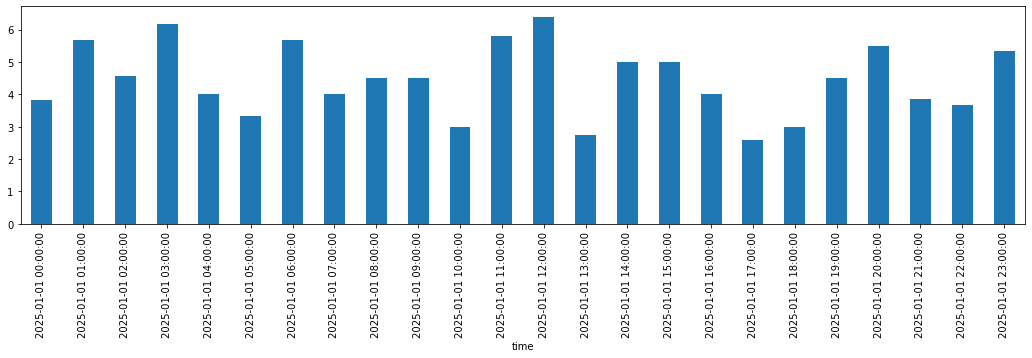

In [8]:
# Let's see what is the mean of ratings given by each user in successive hours during the day (which may be interpreted as the
# change of mood of each user during the day). Let's plot this a random user.

df_ = df.set_index('time').groupby('uid').resample('1h')['rating'].mean().unstack().fillna(0.0)

display(df_)

df_.loc[25].plot(figsize=(18, 4), kind='bar')

In [9]:
# Let's make a sequence of products rated by each user. This pretends a dataset used in sequential or session-based recommender
# systems.

df.set_index('time').sort_index().groupby('uid')['pid'].agg(list)

uid
0      [879, 523, 813, 825, 151, 436, 36, 772, 399, 5...
1      [649, 99, 407, 324, 743, 230, 762, 563, 506, 5...
2      [1, 48, 419, 207, 972, 131, 168, 121, 215, 584...
3      [969, 776, 776, 79, 402, 893, 298, 67, 746, 69...
4      [391, 817, 589, 787, 96, 879, 189, 357, 754, 5...
                             ...                        
995    [889, 783, 444, 312, 623, 9, 296, 190, 641, 75...
996    [178, 314, 399, 293, 586, 289, 821, 492, 432, ...
997    [821, 810, 157, 784, 840, 344, 894, 705, 251, ...
998    [296, 346, 964, 850, 426, 342, 519, 86, 131, 4...
999    [697, 732, 980, 527, 533, 839, 73, 96, 804, 49...
Name: pid, Length: 1000, dtype: object

In [10]:
# Let's create product names and add them to the dataset.
# REMARK: Yes. This is very inefficient - the data are redundant. It would be better to store the product names in a separate
# dataframe indexed by the product id (a type of a dictionary). But I would like to demonstrate here the map() method and the
# lambda expression.

df['product_name'] = df['pid'].map(lambda x: 'Product No. %04d' % x).rename('Product Name')
df

,time,uid,pid,rating,product_name
0,2025-01-01 07:30:06,446,287,7,Product No. 0287
1,2025-01-01 17:10:36,858,647,5,Product No. 0647
2,2025-01-01 18:47:56,656,111,6,Product No. 0111
3,2025-01-01 13:21:21,364,814,1,Product No. 0814
4,2025-01-01 05:43:53,131,359,2,Product No. 0359
...,...,...,...,...,...
99995,2025-01-01 11:45:10,745,882,6,Product No. 0882
99996,2025-01-01 17:04:53,63,435,0,Product No. 0435
99997,2025-01-01 09:18:02,435,214,6,Product No. 0214
99998,2025-01-01 13:00:38,633,570,2,Product No. 0570


In [11]:
# Let's evaluate the mean of ratings given by each user and subtract it from each rating of the user (which makes the rating
# more fair, independent of the user baseline rating)

df1 = df.groupby('uid')['rating'].mean().rename('user_mean_rating').to_frame()

df_u = df.join(df1['user_mean_rating'], how='left', on='uid')
df_u['rating'] = df_u['rating'] - df_u['user_mean_rating']
df_u

,time,uid,pid,rating,product_name,user_mean_rating
0,2025-01-01 07:30:06,446,287,2.844156,Product No. 0287,4.155844
1,2025-01-01 17:10:36,858,647,0.240741,Product No. 0647,4.759259
2,2025-01-01 18:47:56,656,111,1.247059,Product No. 0111,4.752941
3,2025-01-01 13:21:21,364,814,-4.163265,Product No. 0814,5.163265
4,2025-01-01 05:43:53,131,359,-2.137255,Product No. 0359,4.137255
...,...,...,...,...,...,...
99995,2025-01-01 11:45:10,745,882,1.104167,Product No. 0882,4.895833
99996,2025-01-01 17:04:53,63,435,-4.358491,Product No. 0435,4.358491
99997,2025-01-01 09:18:02,435,214,1.752381,Product No. 0214,4.247619
99998,2025-01-01 13:00:38,633,570,-2.432692,Product No. 0570,4.432692


In [12]:
# Let's evaluate the mean of ratings given to each product and subtract it from each rating of the product (which makes the
# rating more fair, independent of the product baseline rating)

df2 = df.groupby('pid')['rating'].mean().rename('product_mean_rating').to_frame()

df_p = df.join(df2['product_mean_rating'], how='left', on='pid')
df_p['rating'] = df_p['rating'] - df_p['product_mean_rating']
df_p

,time,uid,pid,rating,product_name,product_mean_rating
0,2025-01-01 07:30:06,446,287,2.980769,Product No. 0287,4.019231
1,2025-01-01 17:10:36,858,647,0.398058,Product No. 0647,4.601942
2,2025-01-01 18:47:56,656,111,1.800000,Product No. 0111,4.200000
3,2025-01-01 13:21:21,364,814,-3.630435,Product No. 0814,4.630435
4,2025-01-01 05:43:53,131,359,-2.486726,Product No. 0359,4.486726
...,...,...,...,...,...,...
99995,2025-01-01 11:45:10,745,882,1.918919,Product No. 0882,4.081081
99996,2025-01-01 17:04:53,63,435,-4.282828,Product No. 0435,4.282828
99997,2025-01-01 09:18:02,435,214,1.328000,Product No. 0214,4.672000
99998,2025-01-01 13:00:38,633,570,-2.207317,Product No. 0570,4.207317


<AxesSubplot:>

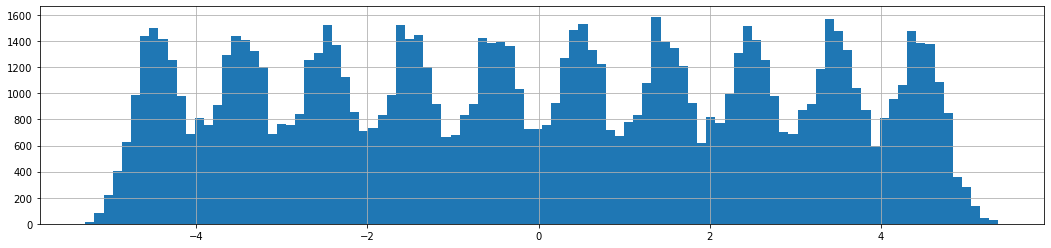

In [13]:
# Let's make a histogram of such relative ratings in the dataset.

df_p['rating'].hist(figsize=(18, 4), bins=100)

,product_rating_std
pid,
0,2.899213
1,2.923151
2,2.828608
3,2.979516
4,2.671514
...,...
995,3.054969
996,2.927722
997,3.065749


<AxesSubplot:>

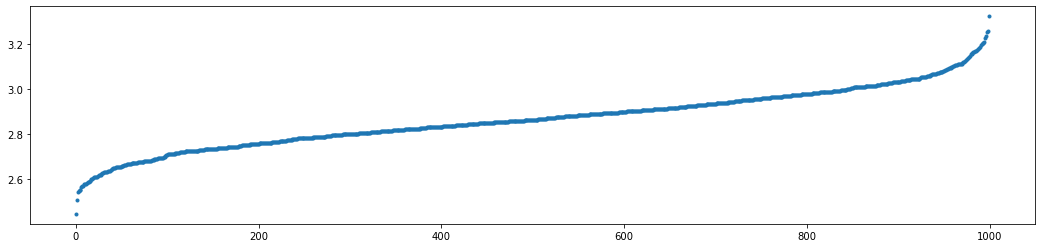

In [14]:
# Let's look at how stable the product ratings are.

df_ = df.groupby('pid')['rating'].std().rename('product_rating_std').to_frame()
display(df_)

df_['product_rating_std'].sort_values().reset_index(drop=True).plot(figsize=(18, 4), linestyle='', marker='.')

In [15]:
# Let's divide the products into 10 groups in terms of the stability of product ratings.

pd.cut(df_['product_rating_std'], bins=10, labels=False).to_frame()

,product_rating_std
pid,
0,5
1,5
2,4
3,6
4,2
...,...
995,6
996,5
997,7


### Assignments:

1. Try to explain the histogram of the relative ratings (especially the seasonality that may be seen in the histogram).
2. Make a sequence of products rated by each user, but consider only the products that were rated more than 50 times between 8 a.m. and 4 p.m.
3. Evaluate the mean of ratings given by each user in successive hours during the day, but consider only the products that were in the 3rd group of the stability of product ratings.

## dask - a package for remote and/or distributed data analysis and manipulation

This notebook uses a data source being a simple .csv file, just for demonstration purposes, but in practice such data sources usually represent connections to remote and/or distributed databases where dask enables remote data analysis and manipulation without downloading big amounts of data.

In [16]:
import dask.dataframe as dd

In [17]:
df.to_csv('tutorial_dataset.csv', index=False)

df = dd.read_csv('tutorial_dataset.csv')
df.head()

,time,uid,pid,rating,product_name
0,2025-01-01 07:30:06,446,287,7,Product No. 0287
1,2025-01-01 17:10:36,858,647,5,Product No. 0647
2,2025-01-01 18:47:56,656,111,6,Product No. 0111
3,2025-01-01 13:21:21,364,814,1,Product No. 0814
4,2025-01-01 05:43:53,131,359,2,Product No. 0359


In [18]:
df1 = df.groupby('uid')['rating'].mean().to_frame()
df1

,rating
npartitions=1,
,float64
,...


In [19]:
df1.compute()

,rating
uid,
0,4.122807
1,4.038835
2,4.038095
3,4.803922
4,3.915094
...,...
995,4.476636
996,3.911765
997,4.684211


In [20]:
df2 = df
df2['uid_random'] = np.random.randint(len(df2))

In [21]:
df2.persist()

,time,uid,pid,rating,product_name,uid_random
npartitions=1,,,,,,
,object,int64,int64,int64,object,int64
,...,...,...,...,...,...
